In [61]:
!pip3 install matplotlib
!pip3 install pandas

In [62]:
from matplotlib import pyplot as plt
import pandas as pd

In [63]:
# 1. Dataframe의 메소드를 활용하여 출력하기
df = pd.read_csv('data/mtcars.csv')

In [64]:
# head
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [65]:
# tail
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [66]:
# shape로 row count 출력 하기
df.shape[0]

32

In [67]:
# column 명을 적절하게 채워넣기
df.rename(columns={'Unnamed: 0': 'model'}, inplace=True)

In [68]:
# info
df.info

<bound method DataFrame.info of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4   

In [69]:
# dtypes
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [70]:
# describe
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [71]:
# 2. gear, transmission features 에는 각각 몇 가지 값이 있는지 출력하기
print(df['gear'].nunique(), df['am'].nunique())

3 2


In [72]:
# 3. gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지 알아내기

# 결과값 화면에 출력하기
from itertools import product

x = []
y = []

gear, am = df['gear'].unique(), df['am'].unique()
for combination in product(gear, am):
    filtered_df = df[(df['gear'] == combination[0]) & (df['am'] == combination[1])]
    print(f"(gear: {combination[0]}, transmission: {combination[1]}) : {filtered_df.shape[0]}")
    x.append(f"({combination[0]}, {combination[1]})")
    y.append(filtered_df.shape[0])


(gear: 4, transmission: 1) : 8
(gear: 4, transmission: 0) : 4
(gear: 3, transmission: 1) : 0
(gear: 3, transmission: 0) : 15
(gear: 5, transmission: 1) : 5
(gear: 5, transmission: 0) : 0


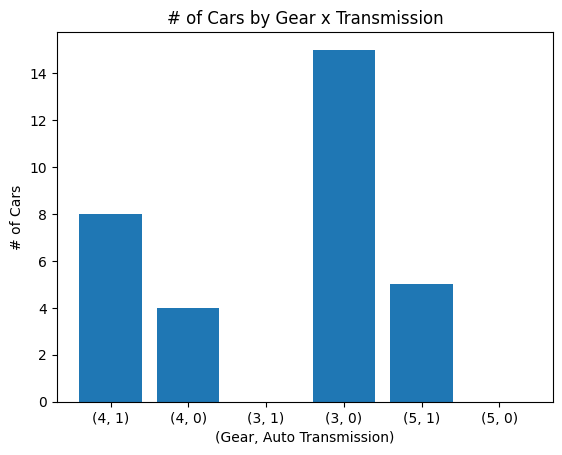

In [73]:
# 결과값 바 그래프로 그리기
plt.bar(x, y)

plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.title('# of Cars by Gear x Transmission')

plt.show()

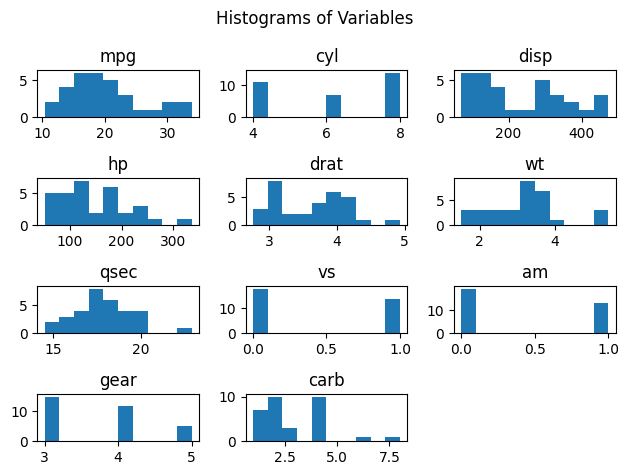

In [74]:
# 4. 데이터셋에 포함된 모든 features의 히스토그램 그리기
ROW_NUM, COL_NUM = 4, 3

for column in df.columns:
    if df[column].dtype == 'object':
        continue
    plt.subplot(ROW_NUM, COL_NUM, df.columns.get_loc(column))
    plt.hist(df[column])
    plt.title(column)

plt.suptitle('Histograms of Variables')
plt.tight_layout()
plt.show()

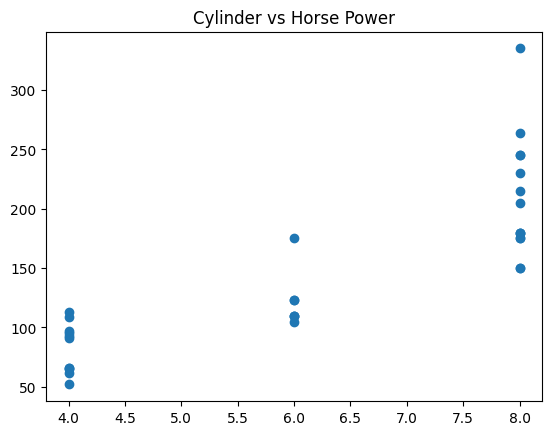

In [75]:
# 5. Cylinder와 HorsePower scatter 차트를 그리기
plt.scatter(df['cyl'], df['hp'])
plt.title('Cylinder vs Horse Power')
plt.show()

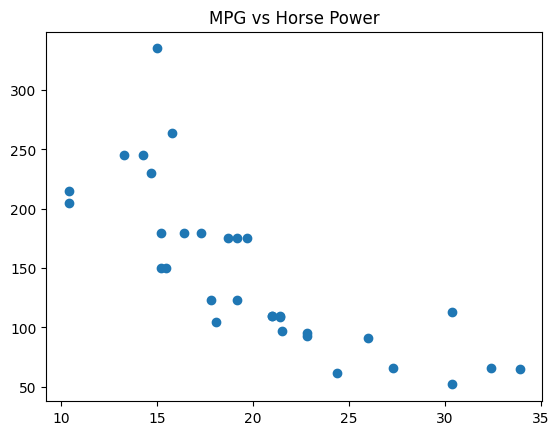

In [76]:
# 6. MPG와 HorsePower scatter 차트를 그리기
plt.scatter(df['mpg'], df['hp'])
plt.title('MPG vs Horse Power')
plt.show()

In [77]:
# 7. 각 변수들 간의 상관계수를 구하는 표를 출력하기
corr_df = df.drop('model', axis=1)
corr_df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
